In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import LSTM, Dense, Dropout, InputLayer, Reshape
from keras. models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

landmark = "lunge_landmark_list.csv"

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import LSTM, Dense, Dropout, InputLayer, Reshape
from keras. models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

landmark = "lunge_landmark_list.csv"

In [25]:
val_data = pd.read_csv("lunge_landmark.csv",header=None)
predict_val = []
predict_val = val_data.iloc[:,1:-1].values

predict_val = np.array(predict_val)
print(predict_val)

[[ 0.34592879  0.32745191 -0.00137423  0.99994683  0.35409832  0.31430691
  -0.0217468   0.99995708  0.35550424  0.31444573 -0.02176742  0.99995041
   0.35691568  0.31459197 -0.0217938   0.99997139  0.35387051  0.31367755
   0.01579606  0.99995553  0.35514283  0.31335637  0.01585071  0.99994731
   0.35644278  0.31293461  0.01591424  0.99995661  0.37019742  0.32391652
  -0.08088129  0.99996793  0.36930031  0.32123825  0.09025352  0.99984097
   0.35083517  0.34264371 -0.02279375  0.99991882  0.35002196  0.34214863
   0.02638373  0.9998005   0.38755843  0.40842646 -0.16615535  0.99997628
   0.38819054  0.39890391  0.18014731  0.99820292  0.41594759  0.60155874
  -0.09926461  0.9998672   0.39692578  0.59816897  0.09917521  0.99966896
   0.52362865  0.69475889 -0.20143154  0.99939549  0.29253498  0.61128211
   0.07909784  0.98536521  0.6360321   0.77145058 -0.20594129  0.9994185
   0.29931056  0.77774131  0.12643771  0.98942357  0.6601873   0.77480465
  -0.20636328  0.99358529  0.31418335  

In [26]:
lunge_data = pd.read_csv(landmark, header=None)

X = []
y = []

X = lunge_data.iloc[:,1:-1].values
print (X[0])
y = lunge_data.iloc[:,-1].values
print (y[0])
    
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

[ 0.49941322  0.19243126 -0.4169195   0.99442202  0.51009083  0.18804693
 -0.39220783  0.99245971  0.51292938  0.18821426 -0.392288    0.99109983
  0.51555359  0.18826306 -0.39233884  0.99410725  0.49965274  0.18903355
 -0.40044358  0.9967829   0.49758485  0.18990533 -0.40057692  0.99622613
  0.49265704  0.19104782 -0.40065125  0.99697864  0.51676697  0.19490921
 -0.25315356  0.99035287  0.48944783  0.18098553 -0.26518282  0.99576569
  0.50742865  0.18980342 -0.36282507  0.99504781  0.49365214  0.20534068
 -0.37187013  0.99659884  0.5453971   0.29321957 -0.14677058  0.99877632
  0.44944644  0.28745887 -0.17851233  0.99772882  0.5322051   0.55098879
  0.01869707  0.99857742  0.46430793  0.55409884 -0.01897386  0.99928093
  0.61963516  0.71426362 -0.11948317  0.92427093  0.3347404   0.65855771
 -0.30570242  0.96686077  0.70053023  0.85394764  0.06048177  0.93089974
  0.32139033  0.89869326 -0.14513992  0.97934091  0.70169139  0.87070388
  0.0739096   0.93256104  0.34476623  0.89381635 -0

In [27]:
#shuffle and split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [28]:
# Build model
model = Sequential()
model.add(InputLayer(shape=(92,)))
model.add(Reshape((1, 92)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 1, 92)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        28,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,852 (116.61 KB)

 Trainable params: 29,852 (116.61 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#define callback and start training
es_callback = EarlyStopping(monitor="val_loss", 
                            verbose=1, 
                            mode="min", 
                            patience=25)

history=model.fit(X_train, y_train, 
                  epochs=500, 
                  batch_size=32, 
                  validation_data=(X_test, y_test), 
                  verbose=1, 
                  callbacks=[es_callback])

Epoch 1/500


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5318 - loss: 0.6906 - val_accuracy: 0.7926 - val_loss: 0.6408
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7142 - loss: 0.6134 - val_accuracy: 0.8138 - val_loss: 0.4907
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7785 - loss: 0.4877 - val_accuracy: 0.8431 - val_loss: 0.3825
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8183 - loss: 0.4046 - val_accuracy: 0.8590 - val_loss: 0.3370
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8523 - loss: 0.3445 - val_accuracy: 0.8644 - val_loss: 0.2611
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8487 - loss: 0.3287 - val_accuracy: 0.8830 - val_loss: 0.2473
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8795 - loss: 0.2941 - val_accuracy: 0.8936 - val_loss: 0.2202
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8812 - loss: 0.2546 - val_accuracy: 0.8963 - val_loss: 0

In [30]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9214 - loss: 0.1739 


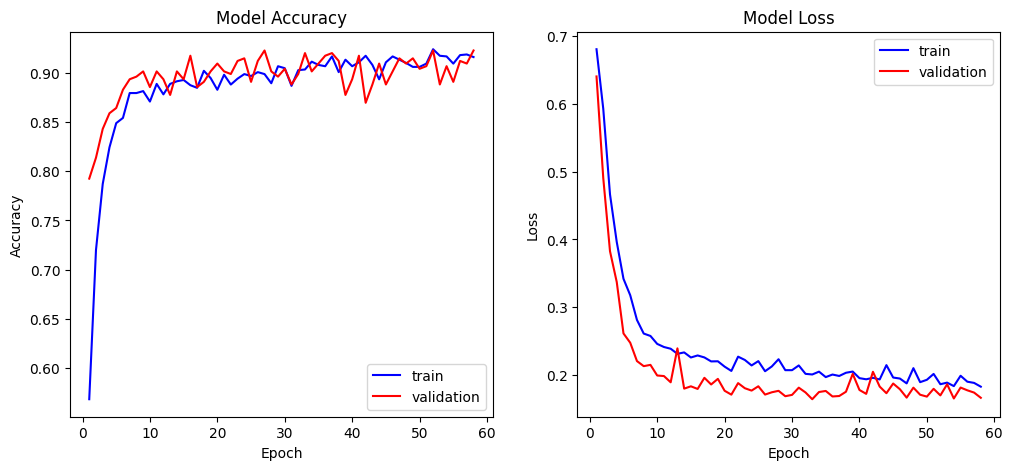

In [31]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    
    # plt.savefig("graph/HandPostureModelTrainingHistory1.png")
    
plot_history(history)

In [32]:

res = model.predict(np.array([predict_val[0]]))
print(np.squeeze(res))
print(np.argmax(np.squeeze(res)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
[9.9966013e-01 3.3982200e-04]
0


In [33]:
model.save('proto_model_test_lstm.h5')